In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

def create_gender_boxplots():

    test_type= ""

    # This is asked in order to put the correct title in the graph.
    while test_type not in ["Maths", "Memory", "ANS"]:
        test_type = input("Please enter Maths, Memory, or ANS: ")

    if test_type== "Maths":
        csv_file= "Maths Data.csv"
        correct_answers= "correct_answers"

    elif test_type== "Memory":
        csv_file= "Memory Data.csv"
        correct_answers= "n_correct_answers"

    dataframe= pd.read_csv(csv_file)    
    dataframe_sorted= dataframe.sort_values("gender", ascending= True)
    female_dataframe= dataframe_sorted[dataframe_sorted["gender"]== "f"]
    male_dataframe= dataframe_sorted[dataframe_sorted["gender"]== "m"]

    # Graph is plotted.
    fig, ax= plt.subplots()
    ax.boxplot([female_dataframe[correct_answers], male_dataframe[correct_answers]])
    ax.set_xlabel("Gender")
    ax.set_ylabel(f"Number of Correct Answers in {test_type} Test")
    ax.set_xticklabels(["Female", "Male"])
    ax.set_title(f"Spread of Correct Answers of Male and Female {test_type} Test Takers")
    plt.show()    
    save= input("Type yes if you want to save your boxplot.")
    
    if save== "yes":
        fig.savefig(f"{test_type} Test Gender Boxplot")
        
    else:
        return
   

def t_test_between_genders():
    
    test_type= ""
    
    while test_type not in ["Maths", "Memory", "ANS"]:
        test_type = input("Please enter Maths, Memory, or ANS: ")

    if test_type== "Maths":
        csv_file= "Maths Data.csv"
        correct_answers= "correct_answers"

    elif test_type== "Memory":
        csv_file= "Memory Data.csv"
        correct_answers= "n_correct_answers"
    
    dataframe= pd.read_csv(csv_file)    
    dataframe_sorted= dataframe.sort_values("gender", ascending= True)
    female_dataframe= dataframe_sorted[dataframe_sorted["gender"]== "f"]
    male_dataframe= dataframe_sorted[dataframe_sorted["gender"]== "m"]

    female_mean= female_dataframe[correct_answers].mean()
    male_mean= male_dataframe[correct_answers].mean()
    female_se= stats.sem(female_dataframe[correct_answers])
    male_se= stats.sem(male_dataframe[correct_answers])
    t_test= stats.ttest_ind(female_dataframe[correct_answers].values, male_dataframe[correct_answers].values)
    print(f"p value is {t_test.pvalue}.")
    
    if t_test.pvalue<= 0.05:
        print("Result is significant a the 0.05 level.")
        
    else:
        print("The result is not significant and we fail to detect a difference in means at the 0.05 level.")
        
def stats_analysis():
    
    print("Please enter what function you would like to use.")
    function= input("boxplot or t_test")
    
    if function== "boxplot":
        create_gender_boxplots()

    elif function== "t_test":
        t_test_between_genders()

Please enter what function you would like to use.


boxplot or t_test boxplot
Please enter Maths, Memory, or ANS:  Maths


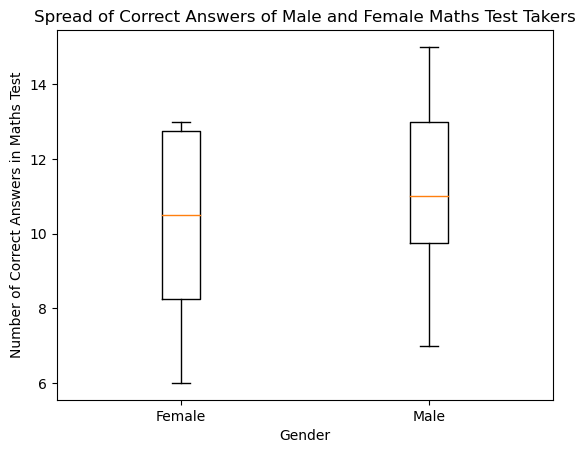

Type yes if you want to save your boxplot. no


In [15]:
stats_analysis()

In [ ]:
# To calculate error bars, sample size must be the same.
    fig, ax= plt.subplots()
    ax.plot(female_dataframe[correct_answers], male_dataframe[correct_answers])
    ax.errorbar(female_mean, yerr= female_se)
    ax.errorbar(male_mean, yerr= male_se)
    ax.set_xlabel("Gender")
    ax.set_ylabel(f"Number of Correct Answers in {test_type} Test")
    ax.set_xticklabels(["Female", "Male"])
    ax.set_title(f"Spread of Correct Answers of Male and Female {test_type} Test Takers")
    plt.show()    

In [ ]:
# Buttons and new imput box are also bugging. smh
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from jupyter_ui_poll import ui_events
from IPython.display import display, Image, clear_output, HTML

event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(interval=0.001, max_rate=20, allow_interupt=True):   
    
    start_wait = time.time()
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1
    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        
        while keep_looping==True:
            ui_poll(n_proc)
            
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            time.sleep(interval)
    
    return event_info

def register_btn_event(btn):
    
    event_info['type'] = "button click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return

def register_text_input_event(text_input):
    event_info['type'] = "text_entry"
    event_info['description'] = text_input.value
    event_info['time'] = time.time()
    return

def text_input(prompt=None):
    text_input = widgets.Text(description=prompt, style= {'description_width': 'initial'})
    import warnings
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    text_input.on_submit(register_text_input_event)
    display(text_input)
    event = wait_for_event()
    text_input.disabled = True
    return event['description']

def better_create_gender_boxplots():
    
    maths_button= widgets.Button(description= "Maths")
    memory_button= widgets.Button(description= "Memory")
    ans_button= widgets.Button(description= "ANS")
    maths_button.on_click(register_btn_event)
    memory_button.on_click(register_btn_event)
    ans_button.on_click(register_btn_event)
    
    print("Please pick your test type.")
    display(maths_button, memory_button, ans_button)
    event_info= wait_for_event()
    test_type= event_info["description"]
    
    csv_file= text_input("Please enter your csv file name.")+ ".csv"
    clear_output(wait= False)
    
    correct_answers= text_input("Please enter the column name for number of correct answers.")
    
    dataframe= pd.read_csv(csv_file)    
    dataframe_sorted= dataframe.sort_values("gender", ascending= True)
    female_dataframe= dataframe_sorted[dataframe_sorted["gender"]== "f"]
    male_dataframe= dataframe_sorted[dataframe_sorted["gender"]== "m"]
    fig, ax= plt.subplots()
    ax.boxplot([female_dataframe[correct_answers], male_dataframe[correct_answers]])
    ax.set_xlabel("Gender")
    ax.set_ylabel(f"Number of Correct Answers in {test_type} Test")
    ax.set_xticklabels(["Female", "Male"])
    ax.set_title(f"Spread of Correct Answers of Male and Female {test_type} Test Takers")
    plt.show()    
    save= text_input("Type yes if you want to save your boxplot.")
    
    if save== "yes":
        fig.savefig(f"{test_type} Test Gender Boxplot")
        
    else:
        return